In [1]:
# K Nearest Neighbors

In [2]:
# import packages 

import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [3]:
# Load data
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00528/dataset.csv", header = 1, sep = ";")

In [4]:
df.head()

,ID,Motorway,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,...,BR,MR,CR,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt
0,1,A1,600,1,1,4,6,2,10,0,...,0,0,1,0,0,0,0,0,0,0
1,2,A1,700,1,5,1,10,6,10,3,...,1,0,1,0,1,1,0,0,1,0
2,3,A1,200,1,5,1,10,6,10,3,...,1,0,1,0,1,1,0,0,1,0
3,4,A1,300,1,5,0,6,10,2,3,...,0,0,1,0,0,1,0,0,0,0
4,5,A1,600,2,1,4,10,2,6,0,...,5,0,1,0,1,1,1,0,1,1


In [5]:
# Remove unnecessary response variables 



In [6]:
# Remove categorical variables
df = df.drop(columns=['ID', 'TR', 'VR', 'SUR1', 'SUR2', 'SUR3', 'UR', 'FR', 'RR', 'BR','MR', 'CR'])

# Preview Data


,Motorway,SR,NR,OR,Fire-bellied toad
0,A1,600,1,50,0
1,A1,700,1,75,0
2,A1,200,1,75,0
3,A1,300,1,25,0
4,A1,600,2,99,1


In [7]:
# Proportion of response variable

df['Fire-bellied toad'].value_counts()

0    131
1     58
Name: Fire-bellied toad, dtype: int64

[None]

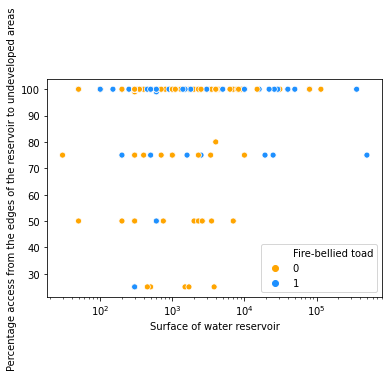

In [8]:
#Scatterplot 1

p =sns.scatterplot(x="SR", y="OR", hue="Fire-bellied toad",
              data=df,palette=['orange','dodgerblue'], legend='full')
plt.xlabel('Surface of water reservoir')
plt.ylabel('Percentage access from the edges of the reservoir to undeveloped areas')
p.set(xscale="log")

[None]

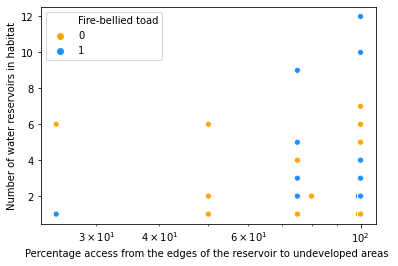

In [9]:
#Scatterplot 2

p =sns.scatterplot(x="OR", y="NR", hue="Fire-bellied toad",
              data=df,palette=['orange','dodgerblue'], legend='full')
plt.xlabel('Percentage access from the edges of the reservoir to undeveloped areas ')
plt.ylabel('Number of water reservoirs in habitat')
p.set(xscale="log")

[None]

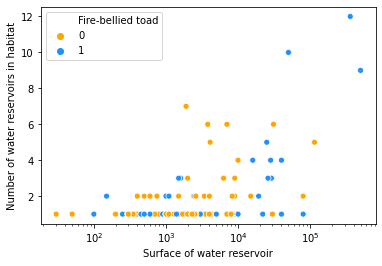

In [10]:
#Scatterplot 3

p =sns.scatterplot(x="SR", y="NR", hue="Fire-bellied toad",
              data=df,palette=['orange','dodgerblue'], legend='full')
plt.xlabel('Surface of water reservoir')
plt.ylabel('Number of water reservoirs in habitat')
p.set(xscale="log")

In [11]:
# Splitting Data
X = df.iloc[:, 1:-1].values
y = df.iloc[:, 4].values

In [12]:
# Creating Train and Test Data



In [13]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
classifier = KNeighborsClassifier(n_neighbors = 3)

In [15]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [16]:
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0
 1 0]


In [17]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[44  8]
 [19  5]]
              precision    recall  f1-score   support

           0       0.70      0.85      0.77        52
           1       0.38      0.21      0.27        24

    accuracy                           0.64        76
   macro avg       0.54      0.53      0.52        76
weighted avg       0.60      0.64      0.61        76



Text(0, 0.5, 'Error rate')

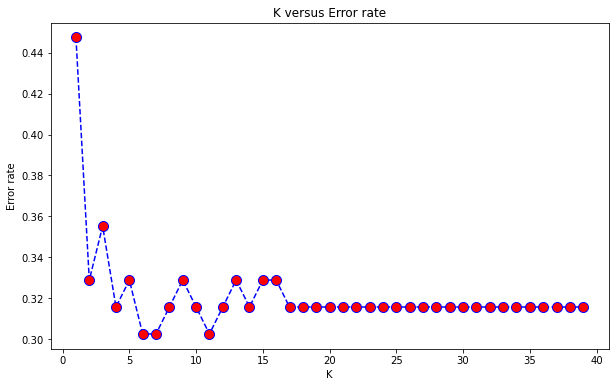

In [18]:
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    
    error_rate.append(np.mean(pred_i != y_test))
    
   
plt.figure(figsize=(10, 6))

plt.plot(range(1, 40), error_rate, color='blue', linestyle='--',
         markersize=10, markerfacecolor='red', marker='o')
plt.title('K versus Error rate')
plt.xlabel('K')
plt.ylabel('Error rate')

In [20]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.40)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size = 0.40)
scaler = StandardScaler()
scaler.fit(X_train2)
scaler.fit(X_train3)
X_train2 = scaler.transform(X_train2)
X_test2 = scaler.transform(X_test2)

X_train3 = scaler.transform(X_train3)
X_test3 = scaler.transform(X_test3)

In [21]:
# Create new KNN object with 17 neighbors



In [22]:
classifier2.fit(X_train2, y_train2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

In [23]:
y_pred2 = classifier2.predict(X_test2)
print(y_pred2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [24]:
print(confusion_matrix(y_test2, y_pred2))
print(classification_report(y_test2, y_pred2))

[[53  2]
 [21  0]]
              precision    recall  f1-score   support

           0       0.72      0.96      0.82        55
           1       0.00      0.00      0.00        21

    accuracy                           0.70        76
   macro avg       0.36      0.48      0.41        76
weighted avg       0.52      0.70      0.59        76



In [33]:
classifier3 = KNeighborsClassifier(n_neighbors = 5)

In [34]:
classifier3.fit(X_train3, y_train3)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [35]:
y_pred3 = classifier3.predict(X_test3)
print(y_pred3)

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0]


In [36]:
# Print confusion matrix and classification report for third KNN test 



[[47  5]
 [20  4]]
              precision    recall  f1-score   support

           0       0.70      0.90      0.79        52
           1       0.44      0.17      0.24        24

    accuracy                           0.67        76
   macro avg       0.57      0.54      0.52        76
weighted avg       0.62      0.67      0.62        76

